In [1]:
import os
import cv2
import numpy as np

In [33]:
def preprocess_frame(frame):
    
    # Apply filtering, smoothing, sharpening, and adjusting brightness and contrast
    blurred = cv2.GaussianBlur(frame, (5, 5), 0)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(blurred, -1, kernel)
    
    alpha = 1.1  # Contrast control
    beta = 15    # Brightness control
    adjusted = cv2.convertScaleAbs(sharpened, alpha=alpha, beta=beta)
    
    # Normalize the image
    normalized = cv2.normalize(adjusted, None, 0, 255, cv2.NORM_MINMAX)
    
    return normalized

In [103]:
def create_gif(frames, gif_path):
    with imageio.get_writer(gif_path, mode='I', duration=0.1) as writer:
        for frame in frames:
            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            writer.append_data(rgb_frame)

def display_gif(gif_path):
    return Image(filename=gif_path)

def save_frames_as_avi(frames, output_path, fps=30):
    if not frames:
        print("No frames to save.")
        return
    
    height, width, layers = frames[0].shape
    size = (width, height)
    
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'XVID'), fps, size)
    
    for frame in frames:
        out.write(frame)
    
    out.release()
    print(f"Video saved as {output_path}")

In [125]:
def ucf50_preprocessing(data_dir, output_dir, class_names, number_of_frames, threshold=40):
    orb = cv2.ORB_create()
    for class_name in class_names:
        class_input_path = os.path.join(data_dir, class_name)
        output_class_path = os.path.join(output_dir, class_name)
        os.makedirs(output_class_path, exist_ok=True)
        
        for video_name in os.listdir(class_input_path):
            video_path = os.path.join(class_input_path, video_name)
            cap = cv2.VideoCapture(video_path)
            relevant_frames = []
            all_frames = []
            prev_descriptors = None
            total_frames = 0
            
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                
                total_frames += 1
                all_frames.append(frame)
                processed_frame = preprocess_frame(frame)
                keypoints, descriptors = orb.detectAndCompute(processed_frame, None)
                
                if descriptors is not None and len(descriptors) > 0:
                    if prev_descriptors is None:
                        relevant_frames.append(frame)
                    else:
                        # Compute the distance between descriptors
                        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
                        matches = bf.match(prev_descriptors, descriptors)
                        distances = [m.distance for m in matches]
                        avg_distance = np.mean(distances)
                        
                        if avg_distance > threshold:
                            relevant_frames.append(frame)
                    
                    prev_descriptors = descriptors
            
            cap.release()
            
            # Ensure minimum number of frames is at least 10
            if len(relevant_frames) < number_of_frames:
                print(f"Selected frames: {len(relevant_frames)}\n")
                needed_frames = number_of_frames - len(relevant_frames)
                relevant_frames.extend(all_frames[:needed_frames])
            
            print(f"Video: {video_name}")
            print(f"Total frames: {total_frames}")
            print(f"Selected frames: {len(relevant_frames)}\n")
            
            # Save the selected frames as an AVI video
            output_video_path = os.path.join(output_class_path, video_name)
            save_frames_as_avi(relevant_frames, output_video_path)
            

In [126]:
data_dir = '../data/raw/UCF50/'

In [127]:
output_dir = '../data/processed/ORB/'

In [133]:
class_names = os.listdir(data_dir)

In [134]:
class_names 

['Mixing',
 'TennisSwing',
 'HorseRiding',
 'JumpRope',
 'JumpingJack',
 'BaseballPitch',
 'Rowing',
 'SkateBoarding',
 'WalkingWithDog',
 'Skijet',
 'Nunchucks',
 'Billiards',
 'PullUps',
 'Swing',
 'PoleVault',
 'GolfSwing',
 'Lunges',
 'PommelHorse',
 'BreastStroke',
 'PlayingPiano',
 'PlayingTabla',
 'Basketball',
 'VolleyballSpiking',
 'SoccerJuggling',
 'CleanAndJerk',
 'YoYo',
 'PushUps',
 'Kayaking',
 'HulaHoop',
 'JugglingBalls',
 'PlayingGuitar',
 'Fencing',
 'ThrowDiscus',
 'MilitaryParade',
 'RopeClimbing',
 'Biking',
 'Punch',
 'Drumming',
 'BenchPress',
 'Diving',
 'SalsaSpin',
 'PizzaTossing',
 'TaiChi',
 'HighJump',
 'JavelinThrow',
 'TrampolineJumping',
 'Skiing',
 'PlayingViolin',
 'HorseRace',
 'RockClimbingIndoor']

In [135]:
ucf50_preprocessing(data_dir, output_dir, class_names, number_of_frames=30)

Video: v_Mixing_g25_c04.avi
Total frames: 107
Selected frames: 94

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g25_c04.avi
Selected frames: 11

Video: v_Mixing_g13_c06.avi
Total frames: 104
Selected frames: 30

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g13_c06.avi
Selected frames: 1

Video: v_Mixing_g03_c06.avi
Total frames: 133
Selected frames: 30

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g03_c06.avi
Selected frames: 3

Video: v_Mixing_g24_c01.avi
Total frames: 126
Selected frames: 30

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g24_c01.avi
Video: v_Mixing_g02_c03.avi
Total frames: 165
Selected frames: 47

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g02_c03.avi
Selected frames: 1

Video: v_Mixing_g12_c03.avi
Total frames: 104
Selected frames: 30

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g12_c03.avi
Selected frames: 1

Video: v_Mixing_g12_c02.avi
Total frames: 99
Selected frames: 30

Video saved as ../data/processed/ORB/Mixi

OpenCV: Couldn't read video stream from file "../data/raw/UCF50/Mixing/.DS_Store"


Video: v_Mixing_g02_c04.avi
Total frames: 165
Selected frames: 54

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g02_c04.avi
Selected frames: 1

Video: v_Mixing_g12_c04.avi
Total frames: 107
Selected frames: 30

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g12_c04.avi
Video: v_Mixing_g25_c03.avi
Total frames: 125
Selected frames: 123

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g25_c03.avi
Video: v_Mixing_g13_c01.avi
Total frames: 111
Selected frames: 38

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g13_c01.avi
Selected frames: 1

Video: v_Mixing_g03_c01.avi
Total frames: 159
Selected frames: 30

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g03_c01.avi
Selected frames: 21

Video: v_Mixing_g13_c03.avi
Total frames: 102
Selected frames: 30

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g13_c03.avi
Selected frames: 1

Video: v_Mixing_g03_c03.avi
Total frames: 135
Selected frames: 30

Video saved as ../data/processed/ORB/Mixing/v_Mixing_g03_c0

In [78]:
import imageio
import matplotlib.pyplot as plt
from IPython.display import Image

In [86]:
# Create GIFs
create_gif(all_frames, 'original_video.gif')
create_gif(relevant_frames, 'selected_frames_video.gif')

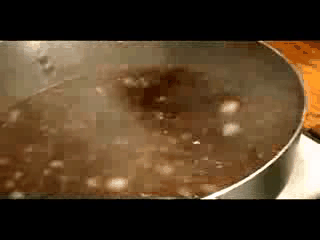

In [84]:
display_gif('original_video.gif')

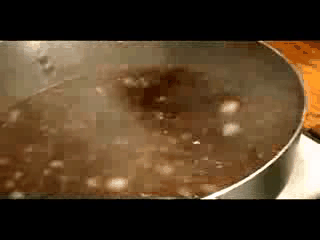

In [85]:
display_gif('selected_frames_video.gif')

In [95]:
# Save selected frames as AVI
save_frames_as_avi(relevant_frames, 'selected_frames_video.avi')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Video saved as selected_frames_video.avi
